In [1]:
import pandas as pd
import warnings
import numpy as np
import sys
import os
import yfinance as yf
import pickle

In [3]:
sys.path.append(os.path.abspath('C:/Users/teeyob/Predictive_Portfolio_Optimizer/scripts'))

In [4]:
from forecast_analysis import load_lstm_model,generate_forecast,calculate_confidence_intervals,visualize_forecast,analyze_trend,calculate_volatility,assess_market_opportunities,prepare_data_for_lstm

In [5]:
from data_analysis_functions import download_data,clean_data

In [6]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2024-11-01'
end_date = '2025-05-31'

data = download_data(tickers, start_date, end_date)

[*********************100%***********************]  3 of 3 completed


In [7]:
data = clean_data(data)
data.head

C:\Users\teeyob\Predictive_Portfolio_Optimizer\scripts\data_analysis_functions.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


<bound method NDFrame.head of                                 TSLA         BND         SPY
Date                                                        
2024-11-01 00:00:00+00:00  72.540001  571.039978  248.979996
2024-11-04 00:00:00+00:00  72.830002  569.809998  242.839996
2024-11-05 00:00:00+00:00  73.010002  576.700012  251.440002
2024-11-06 00:00:00+00:00  72.410004  591.039978  288.529999
2024-11-07 00:00:00+00:00  72.949997  595.609985  296.910004
2024-11-08 00:00:00+00:00  73.089996  598.190002  321.220001>

 Load the saved LSTM model from a pickle file

In [8]:
model=load_lstm_model('C:/Users/teeyob/Predictive_Portfolio_Optimizer/notebook/lstm_model.pkl')

TSLA_data = data['TSLA'].values
TSLA_data

array([72.54000092, 72.83000183, 73.01000214, 72.41000366, 72.94999695,
       73.08999634])

Generates a forecast using the loaded LSTM model

In [9]:
forecast_steps = 365
forecast = generate_forecast(model, TSLA_data, forecast_steps)
print(forecast)
with open("tsla_forecast.pkl", "wb") as f:
    pickle.dump(forecast, f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

 Calculate upper and lower confidence intervals for the forecast

In [25]:
calculate_confidence_intervals(forecast)

(array([ 2.7988212 , -0.0322867 ,  0.01656591,  0.01469475,  0.01476067,
         0.01475846,  0.01475854,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.01475853,  0.01475853,
         0.01475853,  0.01475853,  0.01475853,  0.0

  Plots the original data along with the forecasted values

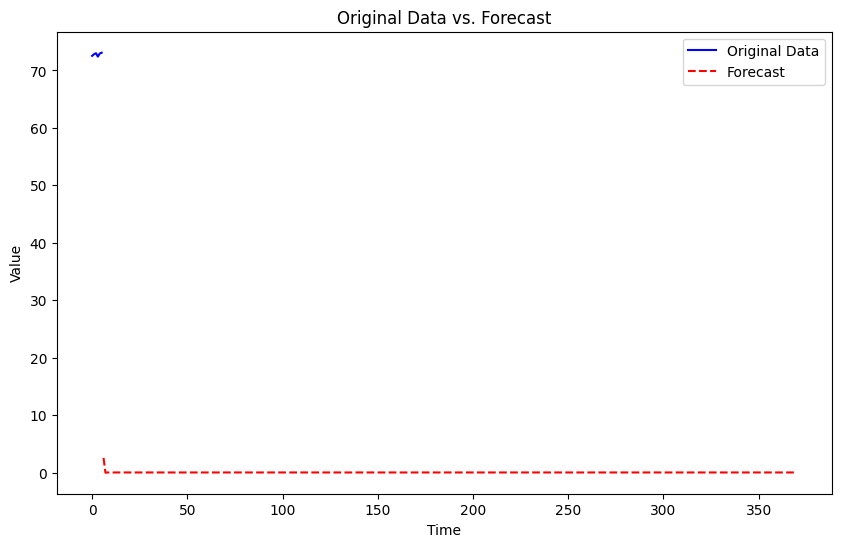

In [26]:
visualize_forecast(TSLA_data,forecast)

Analyze the trend of the forecast

In [27]:
trend_analysis=analyze_trend(forecast)
trend_analysis

'The forecasted trend is downward.'

 Calculate and compare forecast volatility with historical volatility.

In [28]:
volatility_analysis=calculate_volatility(forecast,TSLA_data)
volatility_analysis

('The forecast shows stable or decreased volatility compared to historical levels.',
 count    336.000000
 mean       0.001400
 std        0.025229
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        0.462414
 dtype: float64)

 Assess potential market opportunities and risks based on trend and volatility analysis.

In [29]:
assess_market_opportunities(trend_analysis, volatility_analysis)

trend_analysis: The forecasted trend is downward. (type: <class 'str'>)
volatility_analysis: ('The forecast shows stable or decreased volatility compared to historical levels.', count    336.000000
mean       0.001400
std        0.025229
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.462414
dtype: float64) (type: <class 'tuple'>)
volatility_analysis is a tuple.
volatility_analysis (string description): The forecast shows stable or decreased volatility compared to historical levels.
trend_contains_upward: False
volatility_contains_decreased: True


'The market shows mixed indicators; evaluate carefully before proceeding.'